# Python Basic

![python](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)
### <center>--by wang liyao (leo)<center> ###

# agenda 

- Why Python?
- Work in Python
- Stdandard Type
- Function
- Regular Expression
- Class
- Reference
- Q&A






# Why Python?



>Life is short, you need Python. “人生苦短，我用Python”

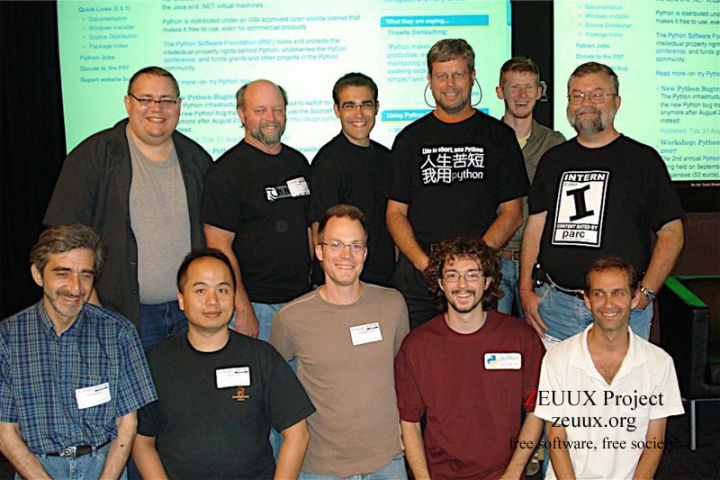

--- ![Bruce Eckel](http://sebsauvage.net/python/)

## python use scenario
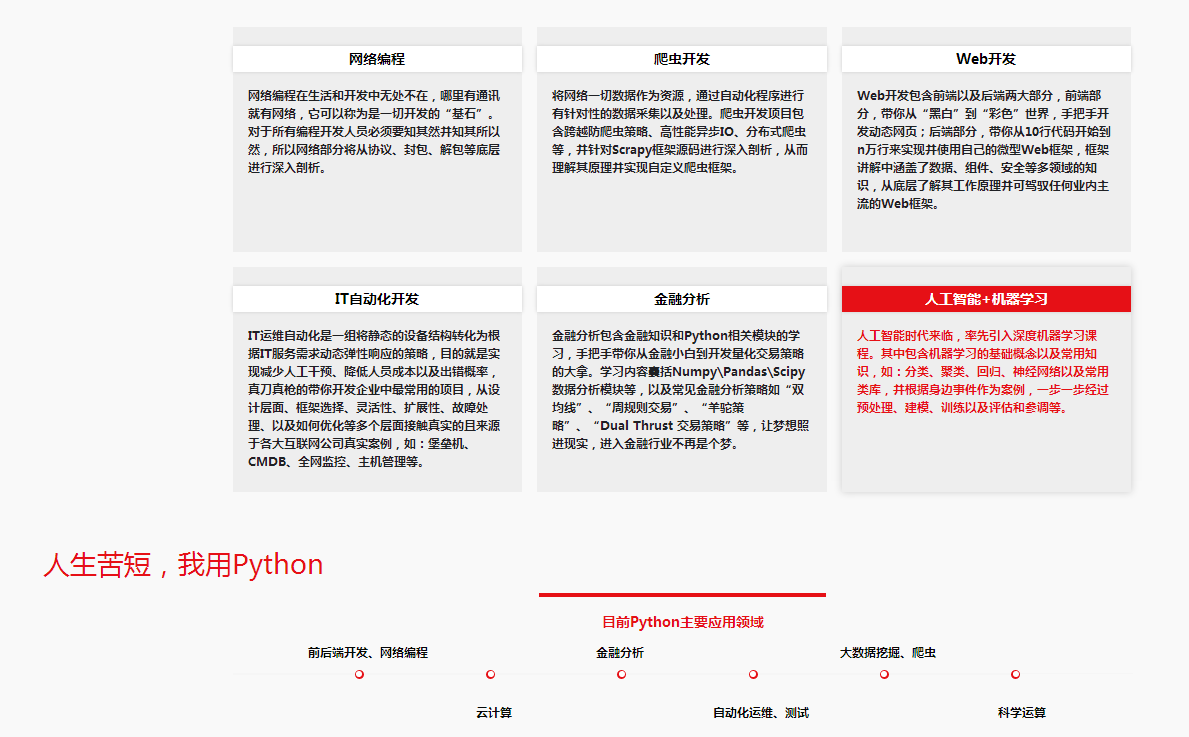





## use python company and market situation

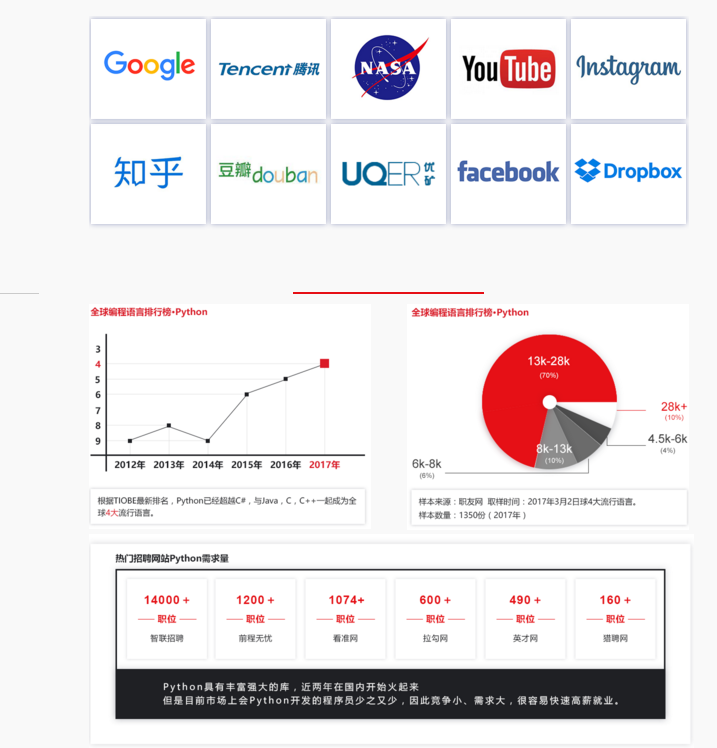
        

# Work in Python

## Work in Python
- install
- Edit
- Debug

## Install 
- Cpython
- Jython
- IronPython 
- Pypy

```python
Python 2.7  vs Python3
$ python –version
Python 2.7.12

import sys
print sys.version_info
print sys.version
```

## Edit
- eclipse
- pycharm
- VIM/Emacs
- Jupyter


## Debug

- print long
** print in python 2
** print() in python 3
** print str(A)
** vars(A), dir(A)

- pdb https://docs.python.org/3/library/pdb.html

- logging https://docs.python.org/3/library/logging.html


# Standard Type


## Standard Type
- int
- string
- list
- tuple
- DIctionary

## Standard Type
### int

- =, +, -, *, /, %, **

- 10, 0b10, 010, 0x10

- int ()
** long() in python 2

- size of int
** 32/64 bits in python 2
** No limit in python 3



## Standard Type
### String
- char in sequences
a = "Hello World"
b = 'Python is groovy'

c = "This is a long string \
which is splitted in tow lines"

d = '''Content-type: text/html
<h1> Hello World </h1>
Click <a href="https://www.python.org">here</a>.
'''


In [7]:
## Standard Type
### String
#### indexing
# 0, 1, 2, 3...-3, -2, -1

a = "Hello World"

b = a[4]

#### Slicing [start:end:stride]

e = a[3:8]
print 'e:', e
f = a[1:9:2]
print "f:", f
c = a[:5]
print "c:", c
d = a[6:]
print 'd:', d

#### string1 + string 2 -> "string1 string2"

print "hello" + "nokia"

#### update -- String is immutable so it can not be changed after creation

a = "string1"
b = a + "tail"
print b, id(a), id(b)




e: lo Wo
f: el o
c: Hello
d: World
hellonokia
string1tail 70505416 70463376


### String
- split, join

s = 'a,b,c,d,e'
l = s.split(',')        # l == [‘a’, ‘b’, ‘c’, ‘d’, ‘e’]
s = '|'.join(l)         # s == 'a|b|c|d|e'

- str()
- len()  --  no recommended 
- ‘’.startswith(‘All’), endswith(‘OK’)
- “”.find(‘the’), “”.rfind(‘end’)
- “”.count(“a”)
- “”.isalnum(), “”.upper(), “”.lower()
- “”.strip()
- “”.replace(‘old’, ‘new’, max_times)




### string

- Exercise
Giving a string “I am from Nokia”. Get these values with string operations.
1) the third char 
2) every 4th char 

In [1]:
# Unit Testing
import unittest

def to_int(data):
    sum = reduce(lambda x,y : x + y, map(lambda x, y: ord(x)*(16**(y*2)), data[::-1], range(len(data))), 0)
    return sum

class TestToInt(unittest.TestCase):
    def test_to_int_with_one_char_string(self):
        self.assertEqual(to_int('\x01'), 1)
    
    def test_to_int_with_two_chars_string(self):
        self.assertEqual(to_int('\xef\x01'), 61185)

suite = unittest.TestLoader().loadTestsFromTestCase(TestToInt)
unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.020s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [5]:
# mock
import time

def delay_print(msg, delay):
    time.sleep(delay)
    print msg
    
import unittest

time.sleep = lambda x: True

class TestDelayPrint(unittest.TestCase):
    def test_delay_print_empty_string(self):
        delay_print('', 5)
            
suite = unittest.TestLoader().loadTestsFromTestCase(TestDelayPrint)
unittest.TextTestRunner().run(suite)

.


----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### One more step

In [12]:
import unittest
from mock import Mock
import re

class FsmAccess(object):

    def __init__(self, connection):
        self.con = connection

    def get_lmp_ip_address(self):
        result = ""
        stderr, stdout = self.con.exec_command("ifconfig eth3")
        pattern = r"(\d{1,4}.\d{1,4}.\d{1,4}.\d{1,4})"
        for line in stdout.split('\n'):
            ret = re.search(pattern, line)
            if ret:
                result = ret.groups()[0]
        return result


class MockConnection(object):

    def exec_command(self, command):
        return  0, 'eth3      Link encap:Ethernet  HWaddr 00:0F:BB:BA:99:CD  \ninet address:10.0.1.2  Bcast:10.0.2.255  Mask:255.255.255.0\nUP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1\nRX packets:0 errors:0 dropped:0 overruns:0 frame:0\nTX packets:16 errors:0 dropped:0 overruns:0 carrier:0\ncollisions:0 txqueuelen:1000\nRX bytes:0 (0.0 B)  TX bytes:1152 (1.1 KiB)'

class TestFsmAccess(unittest.TestCase):
    
    def test_get_lmp_ip_add_not_use_Mock(self):
        mock_instant = MockConnection()
        fsm_instance = FsmAccess(connection=mock_instant)
        ret = fsm_instance.get_lmp_ip_address()
        self.assertEqual(ret, '10.0.1.2')

    def test_get_lmp_ip_address_use_mock(self):
        con_mock = Mock()
        con_mock.exec_command.return_value = 0, 'eth3      Link encap:Ethernet  HWaddr 00:0F:BB:BA:99:CD  \ninet address:10.0.1.2  Bcast:10.0.2.255  Mask:255.255.255.0\nUP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1\nRX packets:0 errors:0 dropped:0 overruns:0 frame:0\nTX packets:16 errors:0 dropped:0 overruns:0 carrier:0\ncollisions:0 txqueuelen:1000\nRX bytes:0 (0.0 B)  TX bytes:1152 (1.1 KiB)'
        fsm_instance = FsmAccess(connection=con_mock)
        ret = fsm_instance.get_lmp_ip_address()
        self.assertEqual(ret, '10.0.1.2')

    def test_get_lmp_ip_address_use_mock_return_value(self):
        fsm_instance = FsmAccess(connection=Mock())
        fsm_instance.con.exec_command = Mock(return_value=(0, 'eth3      Link encap:Ethernet  HWaddr 00:0F:BB:BA:99:CD  \ninet address:10.0.1.2  Bcast:10.0.2.255  Mask:255.255.255.0\nUP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1\nRX packets:0 errors:0 dropped:0 overruns:0 frame:0\nTX packets:16 errors:0 dropped:0 overruns:0 carrier:0\ncollisions:0 txqueuelen:1000\nRX bytes:0 (0.0 B)  TX bytes:1152 (1.1 KiB)'))
        ret = fsm_instance.get_lmp_ip_address()
        self.assertEqual(ret, '10.0.1.2')

    def test_get_lmp_ip_address_use_mock_return_value_new(self):
        fsm_instance = FsmAccess(connection=Mock())
        fsm_instance.con.exec_command = Mock(return_value=(0, 'eth3      Link encap:Ethernet  HWaddr 00:0F:BB:BA:99:CD  \ninet addr:10.0.1.2  Bcast:10.0.2.255  Mask:255.255.255.0\nUP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1\nRX packets:0 errors:0 dropped:0 overruns:0 frame:0\nTX packets:16 errors:0 dropped:0 overruns:0 carrier:0\ncollisions:0 txqueuelen:1000\nRX bytes:0 (0.0 B)  TX bytes:1152 (1.1 KiB)'))
        ret = fsm_instance.get_lmp_ip_address()
        self.assertEqual(ret, '10.0.1.2')

suite = unittest.TestLoader().loadTestsFromTestCase(TestFsmAccess)

unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.017s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

### Practice

> small change with the get_lmp_ip_address example, assume the output word address is addr

    def test_get_lmp_ip_address_with_new_output(self):
        fsm_instance = FsmAccess(connection=Mock())
        fsm_instance.con.exec_command = Mock(return_value=(0, 'eth3      Link encap:Ethernet  HWaddr 00:0F:BB:BA:99:CD  \ninet addr:10.0.1.2  Bcast:10.0.2.255  Mask:255.255.255.0\nUP BROADCAST RUNNING MULTICAST  MTU:1500  Metric:1\nRX packets:0 errors:0 dropped:0 overruns:0 frame:0\nTX packets:16 errors:0 dropped:0 overruns:0 carrier:0\ncollisions:0 txqueuelen:1000\nRX bytes:0 (0.0 B)  TX bytes:1152 (1.1 KiB)'))
        ret = fsm_instance.get_lmp_ip_address()
        self.assertEqual(ret, '10.0.1.2')

## Introspection

![introspection](/files/images/introspection.jpg)

In [ ]:
# dir
import os

print dir(os)

In [ ]:
# type
s = 'hello world'

print type(s)

> Everything is an object in Python.

In [ ]:
a = 5
print type(a)
print type(type(a))

In [ ]:
# hasattr
class DynamicObject(object):
    def __getattr__(self, attr):
        if attr in ('a', 'b', 'c'):
            return attr.upper()
        raise AttributeError

obj = DynamicObject()

print hasattr(obj, 'a')
print hasattr(obj, 'd')


### Practice

In [ ]:
# 1. implement a bash wrapper, so that I can call bash command like a class attribute
#
#     bash = BashWrapper()
#     bash.ping('10.69.69.124')
#     bash.ls('-l', '~')
#
# Write your code here

In [2]:
import subprocess
class BashWrapper(object):
        fun_name = []
        def __getattr__(self, fun): 
            BashWrapper.fun_name.append(fun)
            setattr(self, fun, lambda args: subprocess.check_output('{} {}'.format(BashWrapper.fun_name[0], args),shell=True))
            return self.fun
              
bash = BashWrapper()
print bash.ping("-i 1 127.0.0.1")


Pinging 127.0.0.1 with 32 bytes of data:
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128
Reply from 127.0.0.1: bytes=32 time<1ms TTL=128

Ping statistics for 127.0.0.1:
    Packets: Sent = 4, Received = 4, Lost = 0 (0% loss),
Approximate round trip times in milli-seconds:
    Minimum = 0ms, Maximum = 0ms, Average = 0ms



In [ ]:
# one more step...
# 2. what about a bash wrapper module, so that I can call bash command like a module import
#     from bashwrapper import ping
#     ping('10.69.69.124')
#     from bashwrapper import ls
#     ls('-l', '~')

## Parallel Handling

![run](/files/images/run.png)

In [1]:
# fetch content size from a series of web sites
import urllib
import time

urls = ['http://tdlte-report-server.china.nsn-net.net',
        'http://10.140.161.16/ta_doc/',
        'http://pypi.ute.inside.nsn.com']
begin = time.time()
for url in urls:
    print len(urllib.urlopen(url, proxies={}).read())
end = time.time()
print 'used time:', end-begin

32234
8614
137994
used time: 2.9279999733


In [2]:
# introduce thread
from threading import Thread
import urllib
import time

urls = ['http://tdlte-report-server.china.nsn-net.net',
        'http://10.140.161.16/ta_doc/',
        'http://pypi.ute.inside.nsn.com']

class UrlFetchThread(Thread):
    def __init__(self, url, *args):
        super(UrlFetchThread, self).__init__(*args)
        self._url = url
        
    def run(self):
        print len(urllib.urlopen(self._url).read())

begin = time.time()
threads = map(UrlFetchThread, urls)
for t in threads:
    t.start()
    t.join()
end = time.time()
print 'used time:', end-begin

32234
2420
2429
used time: 2.75999999046


In [3]:
# introduce multi process
from multiprocessing import Process
import urllib
import time

urls = ['http://tdlte-report-server.china.nsn-net.net',
        'http://10.140.161.16/ta_doc/',
        'http://pypi.ute.inside.nsn.com']

class UrlFetchProcess(Process):
    def __init__(self, url, *args):
        super(UrlFetchProcess, self).__init__(*args)
        self._url = url
        
    def run(self):
        print len(urllib.urlopen(self._url).read())
begin = time.time()        
processes = map(UrlFetchProcess, urls)
for p in processes:
    p.start()
    p.join()
end = time.time()
print 'used time:', end - begin

used time: 2.54800009727


In [ ]:
# use Pool
import time
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool

urls = ['http://tdlte-report-server.china.nsn-net.net',
        'http://10.140.161.16/ta_doc/',
        'http://pypi.ute.inside.nsn.com']

def fetch_content(url):
    print len(urllib.urlopen(url).read())

print 'begin test!'
procss_start_time = time.time()
pool = Pool()
pool.map(fetch_content, urls)
pool.close()
pool.join()
procss_end_time = time.time()
print 'proces use time:', procss_end_time - procss_start_time

# -----------------------------------------
thread_start_time = time.time()
thread_pool = ThreadPool()
thread_pool.map(fetch_content, urls)
thread_pool.close()
thread_pool.join()
thread_end_time = time.time()
print 'thread use time:', thread_end_time - thread_start_time

begin test!


In [ ]:
# introduce gevent
import gevent
from gevent import monkey
import time
monkey.patch_all()

urls = ['http://tdlte-report-server.china.nsn-net.net',
        'http://10.140.161.16/ta_doc/',
        'http://pypi.ute.inside.nsn.com']

def fetch_content(url):
    print len(urllib.urlopen(url).read())
begin = time.time()    
[gevent.spawn(fetch_content, url) for url in urls]

gevent.wait()
end = time.time()
print 'used time:', end - begin

In [ ]:
# Queue
from multiprocessing import Process, Queue
import time

def f(q, num):
    q.put([num, None, 'hello'])

if __name__ == '__main__':
    q = Queue()
    begin  = time.time()
    p1 = Process(target=f, args=(q, 12))
    p2 = Process(target=f, args=(q, 24))
    p1.start()
    p2.start()
    print q.get()
    print q.get()
    p1.join()
    p2.join()
    end = time.time()
    print 'used time:', end - begin

### Practice

In [ ]:
# (after class) implement a FAST ftp downloder 
# eg: download ftp://hztdltev01.china.nsn-net.net/esa_data/


## Class

![Python Web](/files/images/pyweb.png)

In [10]:
# 
class A(object):
    def __init__(self, alias='Base'):
        self.alias = alias

    def _echo(self):
        print '---', self.alias

class B():
    def __init__(self):
        self.alias = 'B'
        self.b = A(self.alias)

    def print_fun_B(self):
        self.b._echo()

class C():
    def __init__(self):
        self.alias = 'C'
        self.c = A(self.alias)

    def print_fun_C(self):
        self.c._echo()

class D(B):
    def __init__((self)):
        B.__init__(self)

class E(C):
    def __init__((self)):
        C.__init__(self)

class F(B, C):
    def __init__(self):
        B.__init__(self)
        C.__init__(self)
        

#d=D()
#e=E()
#d.print_fun_B()
#e.print_fun_C()
f=F()
f.print_fun_B()
f.print_fun_C()


--- B
--- C


In [ ]:
# with micro framework bottle.py
from bottle import route, run, template

@route('/hello/<name>')
def index(name):
    return template('<b>Hello {{name}}</b>!', name=name)

run(host='localhost', port=8181)

### Practice

In [ ]:
# implement a simple REST service for user operation using Python, 
#   you can store the user info into memory, DB or files.
#   the return data should be in JSON format, 
#     GET/POST/DELETE method should be supported
# Example:
#     GET  /api/users  ==> 
#         ['tom', 'jerry', 'lily']
#     POST  /api/users  ['james', 'terry']  ==>  
#         ['tom', 'jerry', 'lily', 'james', 'terry']
#     DELETE  /api/users/james  ==>  
#         ['tom', 'jerry', 'lily', 'terry']
from bottle import get, post, delete, response, run
import json

@get('/api/users')
def users():
    response.set_header('Content-Type', 'application/json')
    return json.dumps(['tom', 'jerry', 'lily'])

run(host='localhost', port=11111)

## Reference

* http://www.diveintopython.net/power_of_introspection/
* https://docs.python.org/2/library/inspect.html
* https://docs.python.org/2/howto/functional.html
* https://en.wikipedia.org/wiki/Functional_programming
* https://docs.python.org/2/library/functions.html#iter
* http://butunclebob.com/files/downloads/Prime%20Factors%20Kata.ppt
* https://blog.8thlight.com/uncle-bob/2013/05/27/TheTransformationPriorityPremise.html
* https://wiki.python.org/moin/Generators
* https://docs.python.org/2/library/threading.html
* https://docs.python.org/2/library/multiprocessing.html
* http://www.gevent.org/intro.html
* http://bottlepy.org/docs/dev/index.html
* http://api.mongodb.org/python/current/tutorial.html
* https://docs.python.org/2/library/simplehttpserver.html

## Q & A